In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip "/content/drive/MyDrive/data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Processed_Data/test/fake_test/fake_test_1160.mp4/face/0059.jpg  
  inflating: Processed_Data/test/fake_test/fake_test_1160.mp4/face/0060.jpg  
  inflating: Processed_Data/test/fake_test/fake_test_1160.mp4/face/0061.jpg  
  inflating: Processed_Data/test/fake_test/fake_test_1160.mp4/face/0062.jpg  
  inflating: Processed_Data/test/fake_test/fake_test_1160.mp4/face/0063.jpg  
  inflating: Processed_Data/test/fake_test/fake_test_1160.mp4/face/0064.jpg  
  inflating: Processed_Data/test/fake_test/fake_test_1160.mp4/face/0065.jpg  
  inflating: Processed_Data/test/fake_test/fake_test_1160.mp4/face/0066.jpg  
  inflating: Processed_Data/test/fake_test/fake_test_1160.mp4/face/0067.jpg  
  inflating: Processed_Data/test/fake_test/fake_test_1160.mp4/face/0068.jpg  
  inflating: Processed_Data/test/fake_test/fake_test_1160.mp4/face/0069.jpg  
  inflating: Processed_Data/test/fake_test/fake_test_1160.mp4/face/0070.jpg  
  inflating: 

In [ ]:
!unzip "/content/drive/MyDrive/combined.zip"

Archive:  /content/drive/MyDrive/combined.zip
  inflating: combined.csv            


In [ ]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import cv2

from sklearn.utils import shuffle

In [ ]:
def load_samples(csv_filename):
    data = pd.read_csv(os.path.join('data_files',csv_filename))
    data = data[['FaceFileName','FlowFileName','Label','ClassName']]
    face_file_names = list(data.iloc[:,0])
    flow_file_names = list(data.iloc[:,1])
    labels = list(data.iloc[:,2])
    samples =[]
    for face,flow,lab in zip(face_file_names,flow_file_names,labels):
        samples.append([face,flow,lab])
    
    return samples

In [ ]:
def shuffle_data(data):
    data = shuffle(data,random_state=5)
    return data

In [105]:
def preprocessing(face_img,flow_img,label):
    face_img = face_img/255
    flow_img = flow_img/255
    face_img = np.resize(face_img, (36,36,3))
    flow_img = np.resize(flow_img,(36,36,3))
    num_classes = 2
    one_hot_label = np.array([0,0])
    one_hot_label[label] = 1
    
    return face_img,flow_img,one_hot_label

In [106]:
# it takes samples that are generated by load_samples function

def data_generator(samples,batch_size=32,shuffle_data = True):
    num_samples = len(samples)
    while True:
        if shuffle_data:
            samples = shuffle(samples)
        
        for offset in range(0,num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            
            face_train = []
            flow_train = []
            y_train = []
            
            for batch_sample in batch_samples:
                face_img_name = batch_sample[0]
                flow_img_name = batch_sample[1]
                label = batch_sample[2]
                face_img =  cv2.imread(face_img_name)
                flow_img = cv2.imread(flow_img_name)
                
                face_img,flow_img,label = preprocessing(face_img,flow_img,label)
                
                face_train.append(face_img)
                flow_train.append(flow_img)
                y_train.append(label)
                
            face_train = np.array(face_train)
            flow_train = np.array(flow_train)
            
            y_train = np.array(y_train)

            yield [face_train,flow_train],y_train

In [ ]:
##################################################################################################

In [ ]:
import shutil 

In [ ]:
shutil.move("/content/combined.csv","/content/data_files/combined.csv")

'/content/data_files/combined.csv'

In [ ]:
# img_path = 'contents/model.png'
# tf.keras.utils.plot_model(model,to_file=img_path)

In [ ]:
combined_path = "combined.csv"
combined_samples = load_samples(combined_path)

In [ ]:
len(combined_samples)

775523

In [ ]:
combined_samples = shuffle(combined_samples)

In [ ]:
#combined_samples

In [ ]:
total_samples = len(combined_samples)
split = int(total_samples*0.8)
train_samples = combined_samples[:split]
test_samples = combined_samples[split:]
print(len(train_samples))
print(len(test_samples))

620418
155105


In [ ]:
validation_split = int(len(train_samples)*0.8)
validation_samples = train_samples[validation_split:]
train_samples = train_samples[:validation_split]
print("Total train samples", len(train_samples))
print("Total test samples", len(test_samples))
print("Total validation samples", len(validation_samples))

Total train samples 496334
Total test samples 155105
Total validation samples 124084


In [ ]:
num_train_samples = len(train_samples)
num_test_samples = len(test_samples)
num_validation_samples = len(validation_samples)

In [ ]:
fake_train_samples = 0
real_train_samples = 0
for face,flow,label in train_samples:
  if label == 0:
    fake_train_samples+=1
  else:
    real_train_samples+=1

print(fake_train_samples)
print(real_train_samples)

429045
67289


In [ ]:
fake_test_samples = 0
real_test_samples = 0
for face,flow,label in test_samples:
  if label == 0:
    fake_test_samples+=1
  else:
    real_test_samples+=1

print(fake_test_samples)
print(real_test_samples) 

134133
20972


In [ ]:
fake_validation_samples = 0
real_validation_samples = 0
for face,flow,label in validation_samples:
  if label == 0:
    fake_validation_samples+=1
  else:
    real_validation_samples+=1

print(fake_validation_samples)
print(real_validation_samples)

107268
16816


In [ ]:
################################################################################

In [ ]:
train_data_path = 'train.csv'
test_data_path = 'test.csv'

train_samples = load_samples(train_data_path)
test_samples = load_samples(test_data_path)

num_train_samples = len(train_samples)
num_test_samples = len(test_samples)

print('number of train samples: ', num_train_samples)
print('number of test samples: ', num_test_samples)

number of train samples:  542997
number of test samples:  232526


In [ ]:
train_samples = shuffle(train_samples)
test_samples = shuffle(test_samples)

In [ ]:
num_validation_samples = int(num_train_samples*0.1)

In [ ]:
num_validation_samples

In [ ]:
validation_samples = train_samples[:num_validation_samples]
train_samples = train_samples[num_validation_samples:]

num_train_samples = len(train_samples)
num_test_samples = len(test_samples)
num_validation_samples = len(validation_samples)

print('number of train samples: ', num_train_samples)
print('number of test samples: ', num_test_samples)
print("number of validation samples: ", num_validation_samples)

In [ ]:
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, AveragePooling2D, Activation, Concatenate
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras import Model
from tensorflow.keras.layers import Multiply
import tensorflow as tf

In [ ]:
def get_compiled_model():
  input_shape = (36,36,3)
  num_classes = 2

  face_input = Input(shape = input_shape)

  face_model = Conv2D(32,(3,3), input_shape=input_shape)(face_input)
  face_model = LeakyReLU(alpha=0.1)(face_model)
  face_model = AveragePooling2D((2, 2))(face_model)
  face_model = Dropout(0.25)(face_model)

  flow_input = Input(shape = input_shape)

  flow_model = Conv2D(32,(3,3))(flow_input)
  flow_model = LeakyReLU(alpha=0.1)(flow_model)
  flow_model = AveragePooling2D((2, 2))(flow_model)
  flow_model = Dropout(0.25)(flow_model)

  flow_model = Multiply()([face_model,flow_model])

  face_model = Conv2D(64,(3,3))(face_model)
  face_model = LeakyReLU(alpha=0.1)(face_model)
  face_model = AveragePooling2D((2, 2))(face_model)
  face_model = Dropout(0.25)(face_model)

  face_model = Conv2D(128,(3,3))(face_model)
  face_model = LeakyReLU(alpha=0.1)(face_model)
  face_model = AveragePooling2D((2, 2))(face_model)
  face_model = Dropout(0.25)(face_model)


  flow_model = Conv2D(64,(3,3))(flow_model)
  flow_model = LeakyReLU(alpha=0.1)(flow_model)
  flow_model = AveragePooling2D((2, 2))(flow_model)
  flow_model = Dropout(0.25)(flow_model)

  flow_model = Conv2D(128,(3,3))(flow_model)
  flow_model = LeakyReLU(alpha=0.1)(flow_model)
  flow_model = AveragePooling2D((2, 2))(flow_model)
  flow_model = Dropout(0.25)(flow_model)


  conv = Multiply()([face_model,flow_model])
  conv = Dropout(0.25)(conv)
  conv = Flatten()(conv)

  dense = Dense(512)(conv)
  dense = LeakyReLU(alpha=0.1)(dense)
  dense = Dropout(0.5)(dense)

  output = Dense(num_classes,activation='softmax')(dense)
  model = Model(inputs=[face_input,flow_input], outputs = [output])
  model.compile(loss = "binary_crossentropy",optimizer = "adam", metrics = ['accuracy'])

  return model
  

In [ ]:
strategy = tf.distribute.MirroredStrategy()
print("Number of devices: {}".format(strategy.num_replicas_in_sync))

# Open a strategy scope.
with strategy.scope():
    # Everything that creates variables should be under the strategy scope.
    # In general this is only model construction & `compile()`.
    model = get_compiled_model()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of devices: 1


In [ ]:
batch_size = 128
train_generator = data_generator(train_samples,batch_size=128)
validation_generator = data_generator(validation_samples,batch_size=128)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

hist = model.fit(
        train_generator,
        epochs = 20,
        steps_per_epoch = num_train_samples//batch_size + 1,
        validation_data = validation_generator,
        validation_batch_size = 128,
        validation_steps = num_validation_samples//batch_size, 
        callbacks=[callback]
      )

Epoch 1/20
3878/3878 [==============================] - 1220s 307ms/step - loss: 0.3702 - accuracy: 0.8697 - val_loss: 0.3451 - val_accuracy: 0.8783
Epoch 2/20
3878/3878 [==============================] - 878s 226ms/step - loss: 0.3104 - accuracy: 0.8911 - val_loss: 0.2856 - val_accuracy: 0.8994
Epoch 3/20
3878/3878 [==============================] - 837s 216ms/step - loss: 0.2667 - accuracy: 0.9078 - val_loss: 0.2579 - val_accuracy: 0.9106
Epoch 4/20
3878/3878 [==============================] - 707s 182ms/step - loss: 0.2396 - accuracy: 0.9166 - val_loss: 0.2397 - val_accuracy: 0.9166
Epoch 5/20
3878/3878 [==============================] - 822s 212ms/step - loss: 0.2184 - accuracy: 0.9230 - val_loss: 0.2145 - val_accuracy: 0.9243
Epoch 6/20
3878/3878 [==============================] - 788s 203ms/step - loss: 0.2008 - accuracy: 0.9290 - val_loss: 0.1942 - val_accuracy: 0.9307
Epoch 7/20
3878/3878 [==============================] - 782s 202ms/step - loss: 0.1856 - accuracy: 0.9336 - val

In [ ]:
test_generator = data_generator(test_samples,batch_size=128)
batch_size = 128

In [ ]:
scores = model.evaluate(test_generator,steps = num_test_samples//batch_size) 

1211/1211 [==============================] - 286s 236ms/step - loss: 0.1198 - accuracy: 0.9569


In [ ]:
model_dir = os.path.join(os.getcwd(),'model_randomstate5_epoch20.h5')
model.save_weights(model_dir)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
hist.history

{'accuracy': [0.8696542978286743,
  0.8911479115486145,
  0.9077556729316711,
  0.916610598564148,
  0.9229671955108643,
  0.9289732575416565,
  0.9335729479789734,
  0.9375762939453125,
  0.941013514995575,
  0.9453029632568359,
  0.9476199746131897,
  0.9504023790359497,
  0.9527878165245056,
  0.9550081491470337,
  0.957000732421875,
  0.9593801498413086,
  0.9606031179428101,
  0.9623540043830872,
  0.9637522101402283,
  0.9648663997650146],
 'loss': [0.37018144130706787,
  0.3103775680065155,
  0.2667338252067566,
  0.23961491882801056,
  0.21836677193641663,
  0.2007737010717392,
  0.1855964958667755,
  0.1731680929660797,
  0.16233684122562408,
  0.15088419616222382,
  0.1434723436832428,
  0.13548296689987183,
  0.12833364307880402,
  0.1227101981639862,
  0.11652196943759918,
  0.11064514517784119,
  0.10628793388605118,
  0.10199110209941864,
  0.09816239774227142,
  0.09514802694320679],
 'val_accuracy': [0.8783378601074219,
  0.8993594646453857,
  0.9106053709983826,
  0.91

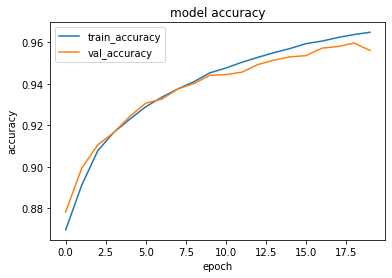

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

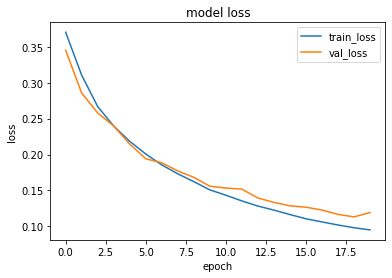

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['validation_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()

In [ ]:
np.save('my_history.npy',hist.history)

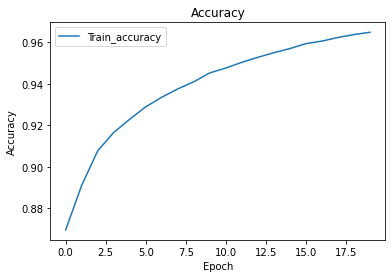

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_accuracy'], loc='upper left')
plt.show()

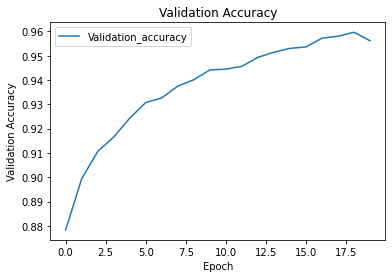

In [ ]:
plt.plot(hist.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation_accuracy'], loc='upper left')
plt.show()

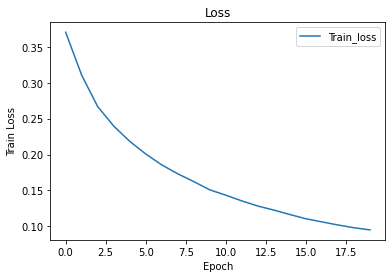

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Loss')
plt.ylabel('Train Loss')
plt.xlabel('Epoch')
plt.legend(['Train_loss'], loc='upper right')
plt.show()

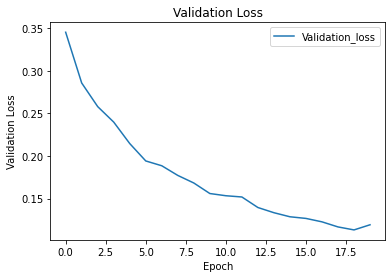

In [ ]:
plt.plot(hist.history['val_loss'])
plt.title('Validation Loss')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend(['Validation_loss'], loc='upper right')
plt.show()

In [ ]:
training_accuracy=np.array(hist.history['accuracy'])
validation_accuracy=np.array(hist.history['val_accuracy'])
training_loss=np.array(hist.history['loss'])
validation_loss=np.array(hist.history['val_loss'])

In [ ]:
print(training_accuracy)
print(validation_accuracy)
print(training_loss)
print(validation_loss)

[0.8696543  0.89114791 0.90775567 0.9166106  0.9229672  0.92897326
 0.93357295 0.93757629 0.94101351 0.94530296 0.94761997 0.95040238
 0.95278782 0.95500815 0.95700073 0.95938015 0.96060312 0.962354
 0.96375221 0.9648664 ]
[0.87833786 0.89935946 0.91060537 0.91656715 0.92430377 0.9307254
 0.93263739 0.93750203 0.94011587 0.94411725 0.94446415 0.94560975
 0.94931269 0.95141822 0.95301557 0.95358837 0.95720255 0.95799315
 0.95963889 0.95613766]
[0.37018144 0.31037757 0.26673383 0.23961492 0.21836677 0.2007737
 0.1855965  0.17316809 0.16233684 0.1508842  0.14347234 0.13548297
 0.12833364 0.1227102  0.11652197 0.11064515 0.10628793 0.1019911
 0.0981624  0.09514803]
[0.34508523 0.28558841 0.25786412 0.23970194 0.21454233 0.19415633
 0.18851173 0.17718029 0.1682948  0.15595117 0.15336375 0.15190147
 0.13955027 0.13346206 0.12869361 0.12675878 0.12274713 0.11678641
 0.1132787  0.1193058 ]


In [ ]:
np.save('train_accuracy.npy',training_accuracy)
np.save('val_accuracy.npy',validation_accuracy)
np.save('train_loss.npy',training_loss)
np.save('val_loss.npy',validation_loss)

In [66]:
len(test_samples)

155105

In [107]:
test_generator=data_generator(test_samples,batch_size=128,shuffle_data=False)


In [108]:
batch_size=128

In [109]:
output=model.predict(test_generator,steps= num_test_samples//batch_size)

In [113]:
type(output)

numpy.ndarray

In [115]:
np.save("output.npy",output)

In [116]:
new=np.load("output.npy")